# TITANIC DATASET

In this we'll be doing EDA on titanic dataset and will be applying logistic regression model to predict a classification- survival or deceased.

In [55]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
# Loading the dataset
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis (EDA)

In [57]:
# Missing data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

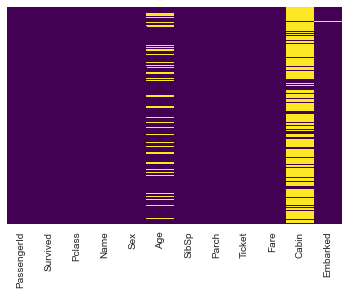

In [58]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From above heatmap, we can see that there are null values in Age, Cabin and Embarked column.

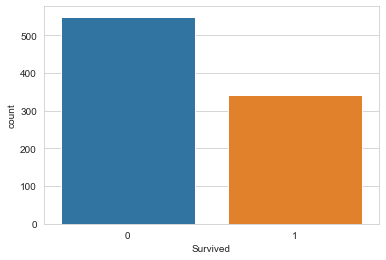

In [59]:
# Countplot to see number of people survived and not survived
sns.set_style("whitegrid")
sns.countplot(x='Survived',data=train)

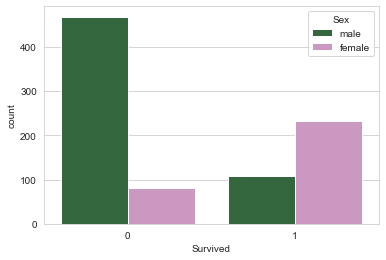

In [60]:
# Countplot to see how many male and females survived
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Sex',data=train,palette='cubehelix')

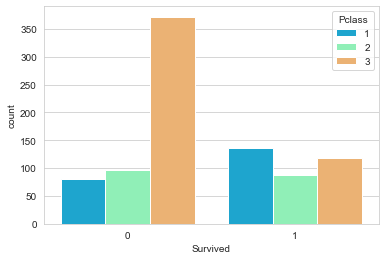

In [61]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=train,palette='rainbow')

From the above countplot we can say that, more number of passenger who died were from Pclass 3 while the passengers who
survived were mostly from Pclass =1

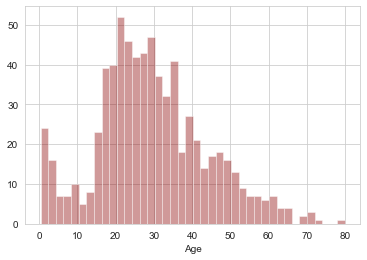

In [62]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

distplot is used to get histogram and histogram is used to find frequency or count (of people) in particular range.

From the above distplot we found that most of people in titanic ship was in the age range of 17 to 30 years.

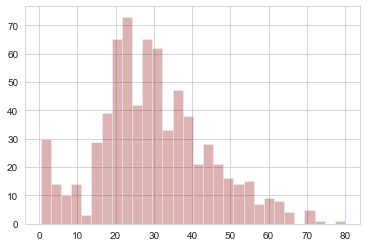

In [63]:
# using matplotlib
train['Age'].hist(bins=30,color='darkred',alpha=0.3)
# bins means 'intervals' or 'classes'

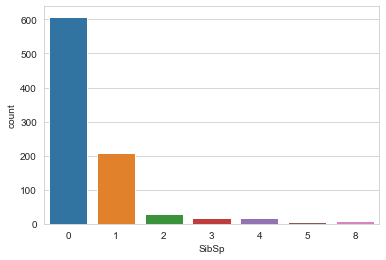

In [64]:
sns.countplot(x='SibSp',data=train)

From above plot we found that most of passenger were travelling without any Siblings and Spouse.

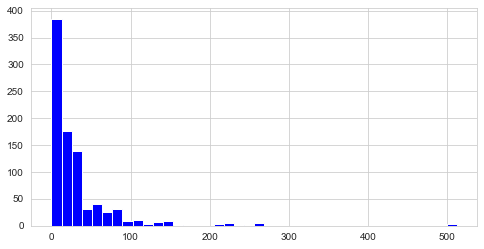

In [65]:
train['Fare'].hist(bins=40,color='blue',figsize=(8,4))

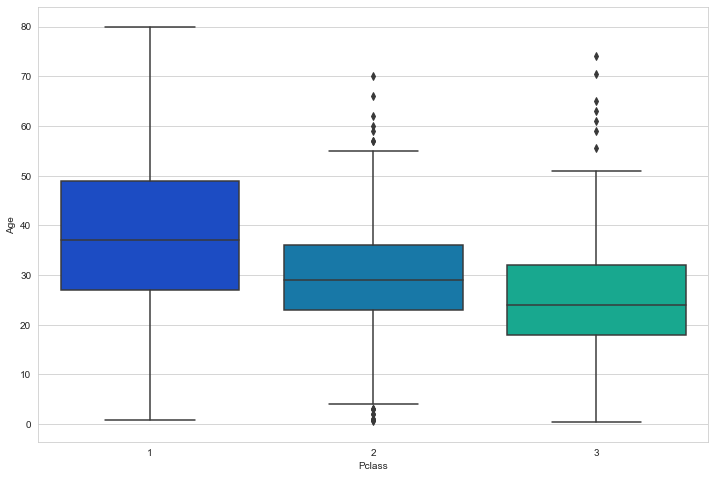

In [66]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

From the above boxplot we found that, in Passenger class 1, the average age of people is around 37 yrs while in
passenger class 2 average age is somewhere around 29 yrs while in passenger class 3 average age is around 24 yrs.

We can see that wealthier passengers in the higher class tend to be older, which make sense. We'll use these average age values to impute based on Pclass for Age.

In [67]:
def impute_ages(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

Now apply that function

In [68]:
train['Age'] = train[['Age','Pclass']].apply(impute_ages,axis=1)

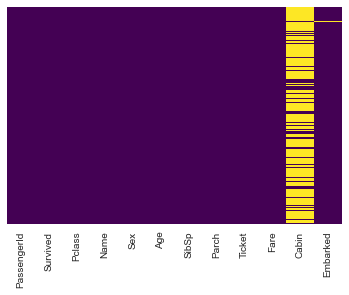

In [69]:
# Now lets check the heatmap again
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [70]:
# Perfect !! Now drop the cabin column and the row in embarked that is Nan

since in cabin column there is many null values, so drop this column.

In [71]:
train.drop('Cabin',axis=1,inplace=True)

In [72]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [73]:
# Now remove the rows with nan values
train.dropna(inplace=True)

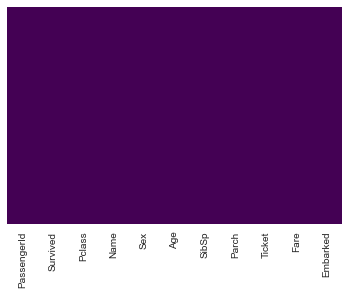

In [74]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great !! Now there is no null value in our data..

# Converting categorical features

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [76]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [77]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [78]:
pd.get_dummies(train['Embarked'],drop_first=True).head()  # drop_first=True means remove first column. since 2 columns are sufficient to represent Embarked column values

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [79]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [80]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [81]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [82]:
train = pd.concat([train,sex,embarked],axis=1)

In [83]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Great !! our data is ready for our model.

# Building our model

In [84]:
train.drop('Survived',axis=1).head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [85]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [86]:
# train test split
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.3,random_state=42)

# Training and Predicting

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
logmodel = LogisticRegression()

In [90]:
logmodel.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [91]:
y_pred = logmodel.predict(X_test)

In [92]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
accuracy = confusion_matrix(y_test, y_pred)

In [95]:
accuracy

array([[146,  21],
       [ 31,  69]], dtype=int64)

Here, the diagonal values are right elements and remaining are wrong elements

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
accuracy = accuracy_score(y_test, y_pred)

In [98]:
accuracy

0.8052434456928839

Therefore, accuracy of our model is 80.5%